In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
#!pip install librosa
import librosa
import IPython.display as ipd
from scipy import fftpack
from scipy.fftpack import fft
from scipy.fftpack import fft
from numpy.fft import fft,fftfreq,ifft
from numpy import imag ,real
import zipfile
from io import StringIO
import glob
import cmath

In [258]:



z = zipfile.ZipFile('C:/Users/ME/Downloads/time-series.zip')
count=0
df_list = []
for i in z.infolist():
    df_list.append(pd.read_csv(StringIO(z.read(i.filename).decode('utf_8'))))

print(df_list[0])

    

         timestamp   value  label
0       1491041280  1839.0      0
1       1491041340  1842.0      0
2       1491041400  1947.0      0
3       1491041460  1985.0      0
4       1491041520  1931.0      0
...            ...     ...    ...
147663  1500105120  1591.0      0
147664  1500105180  1514.0      0
147665  1500105240  1497.0      0
147666  1500105300  1532.0      0
147667  1500105360  1587.0      0

[147668 rows x 3 columns]


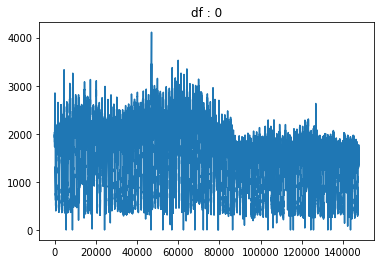

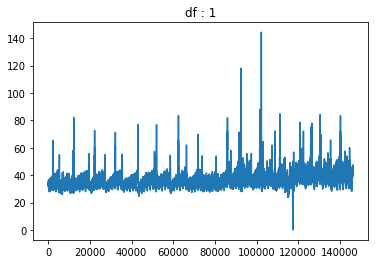

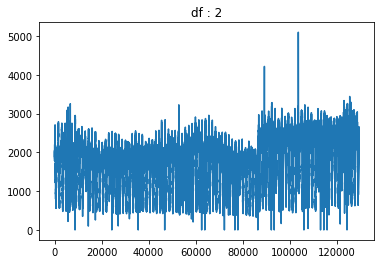

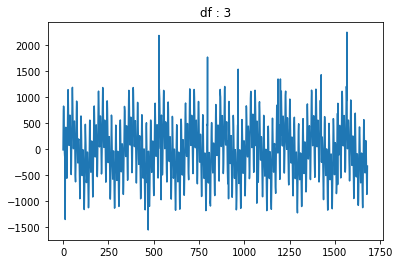

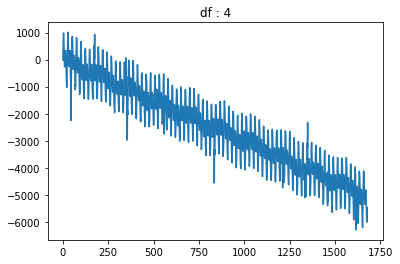

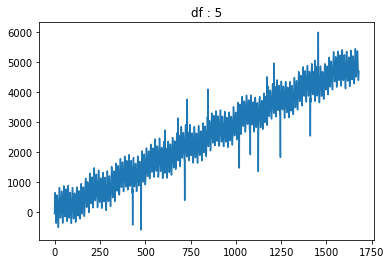

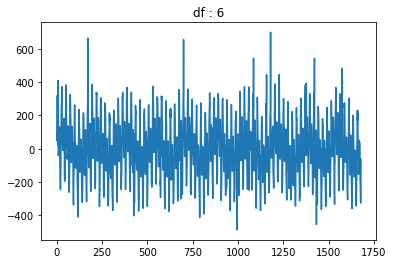

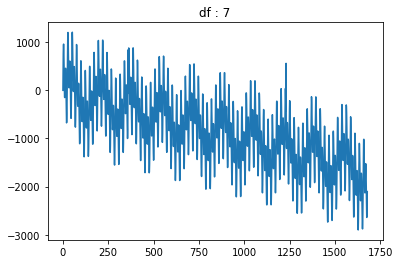

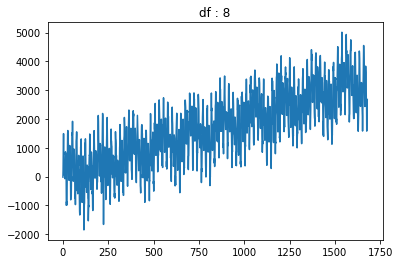

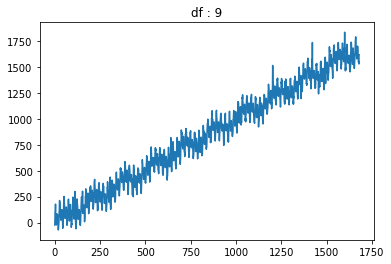

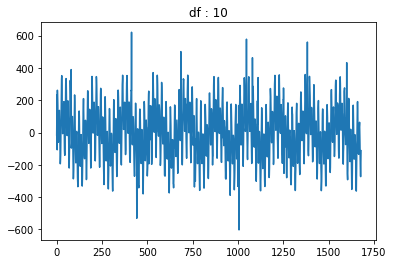

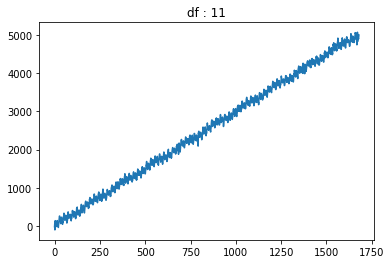

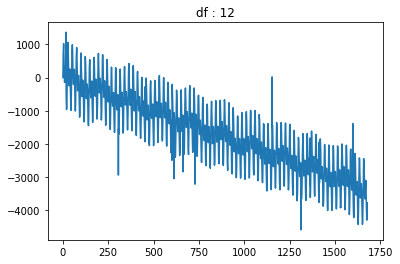

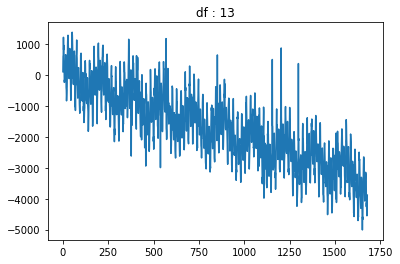

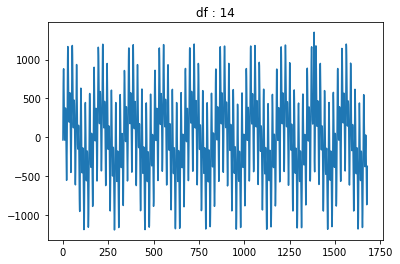

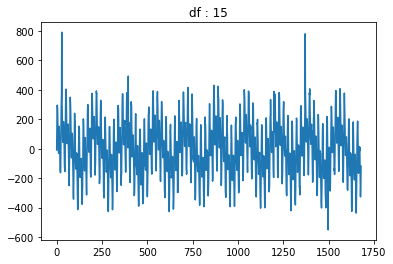

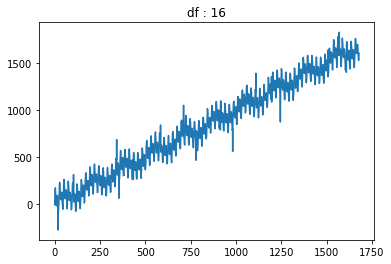

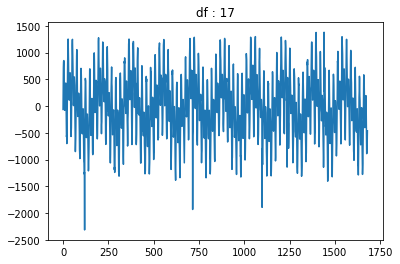

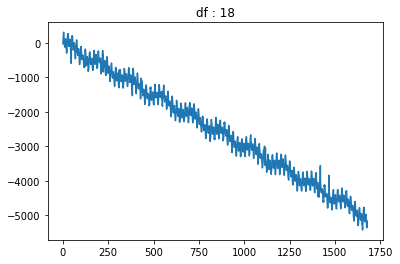

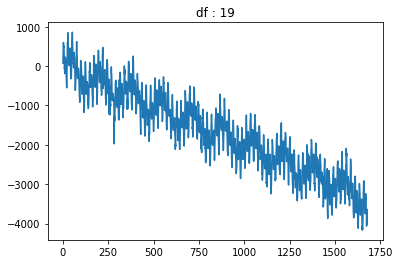

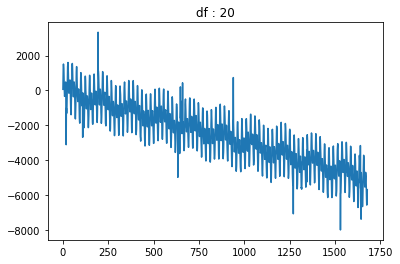

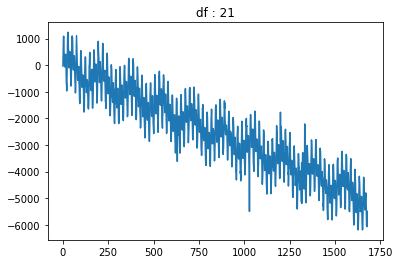

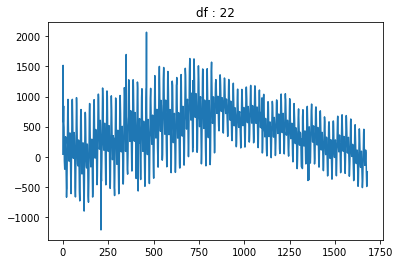

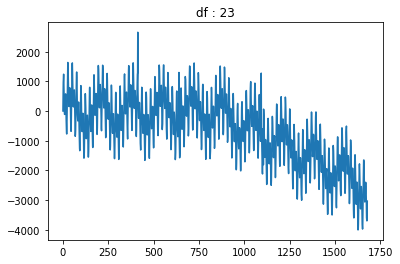

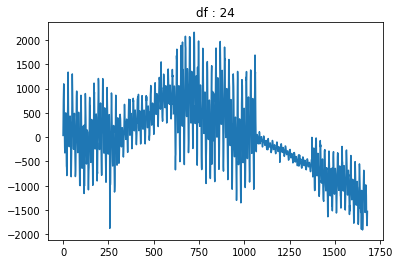

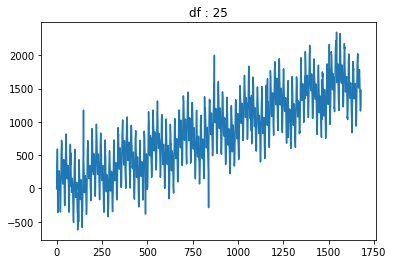

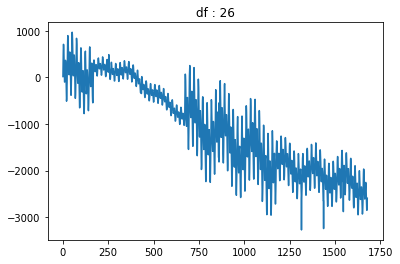

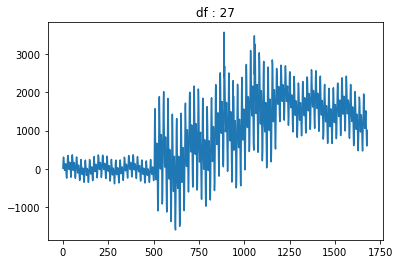

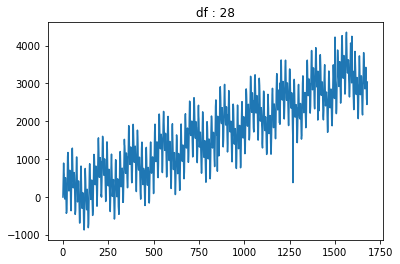

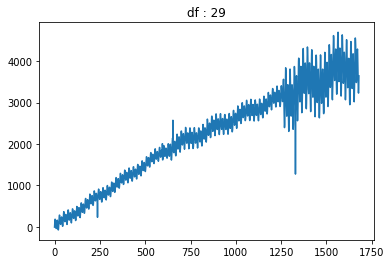

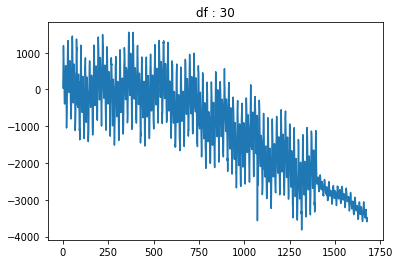

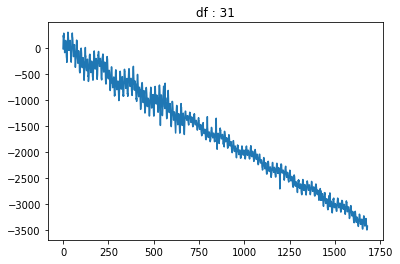

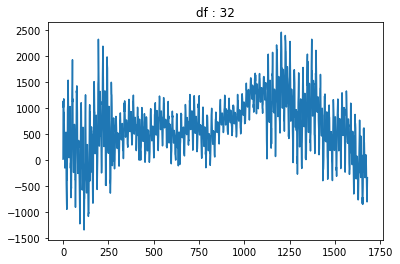

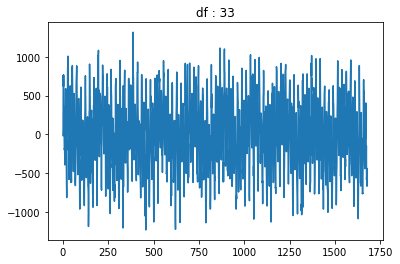

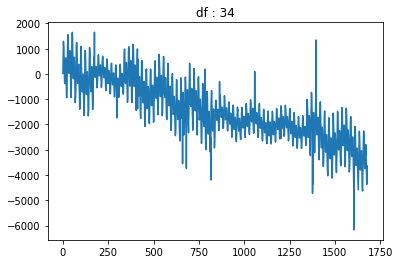

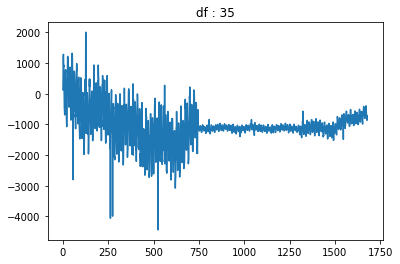

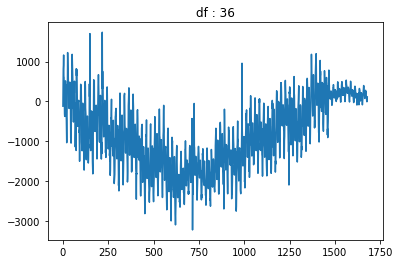

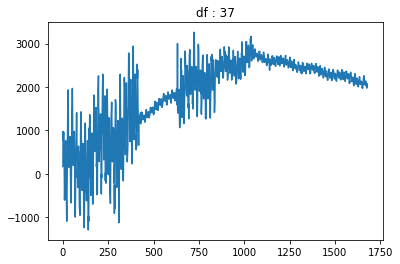

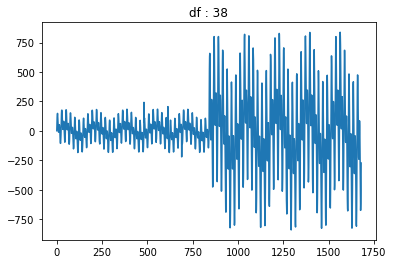

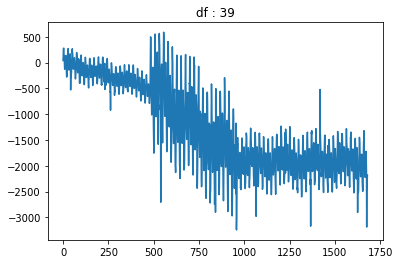

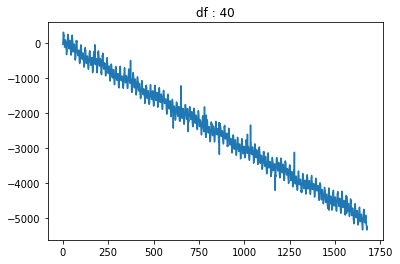

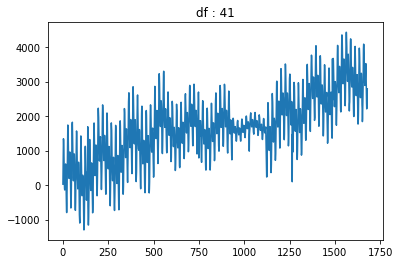

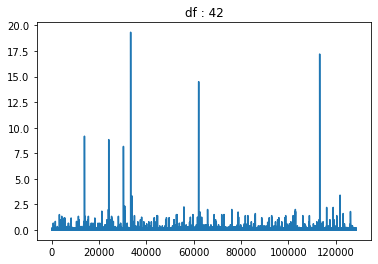

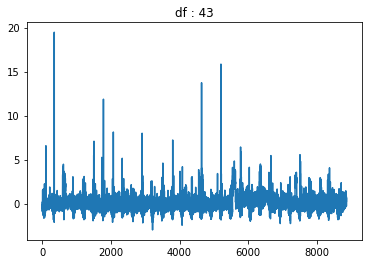

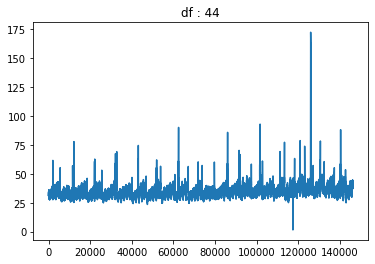

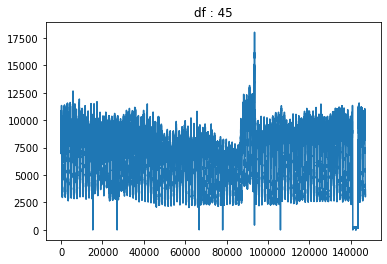

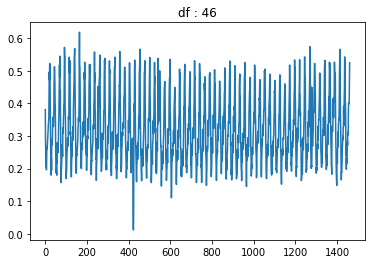

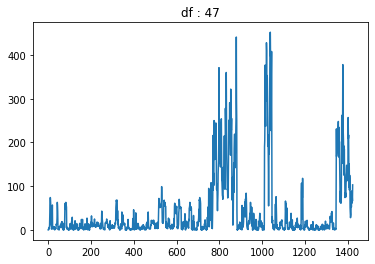

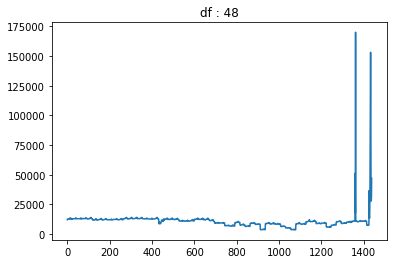

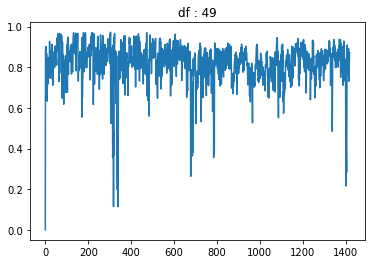

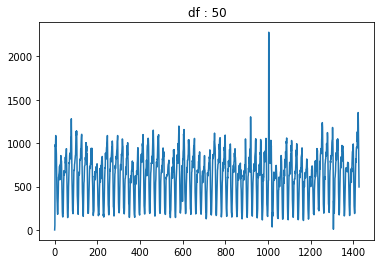

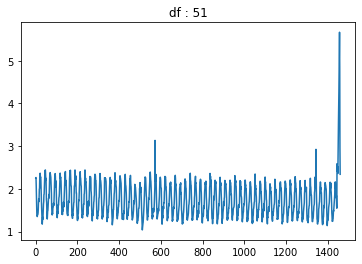

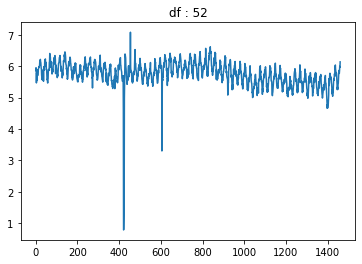

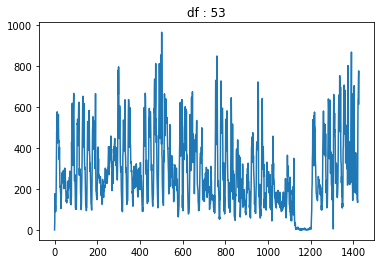

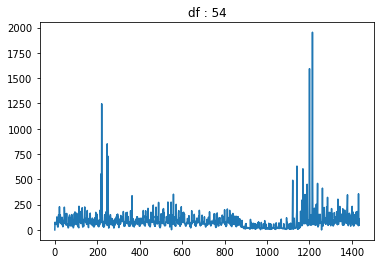

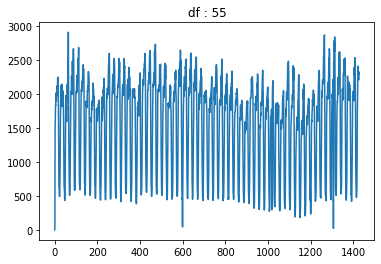

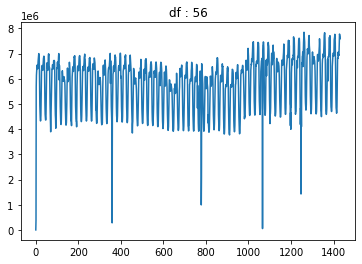

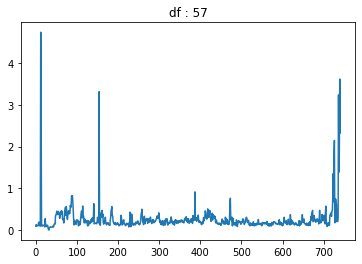

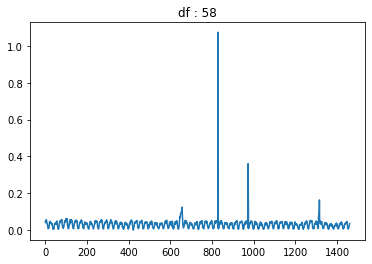

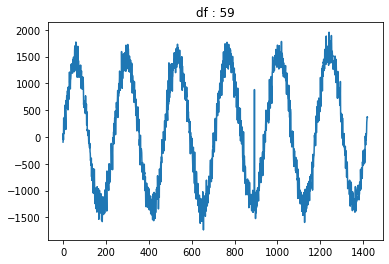

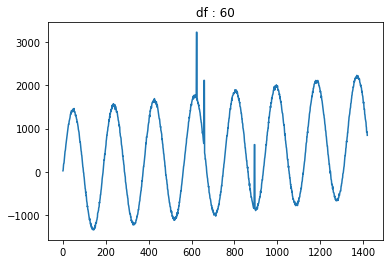

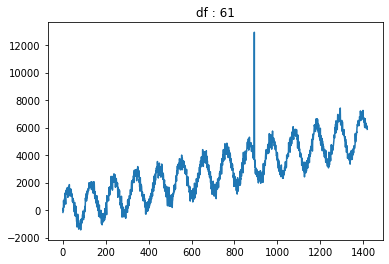

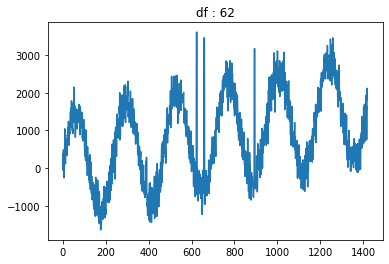

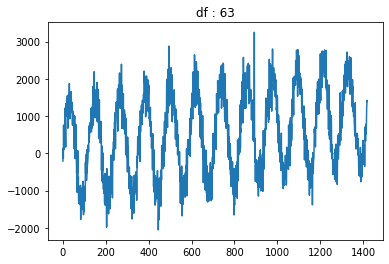

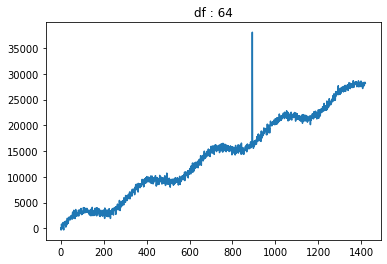

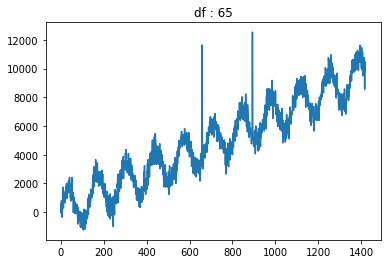

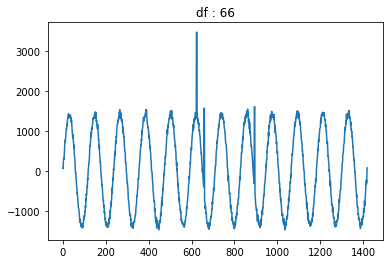

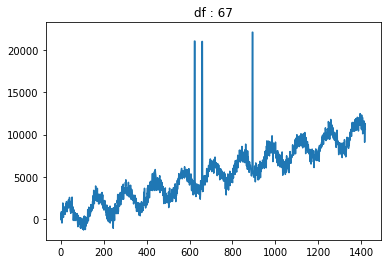

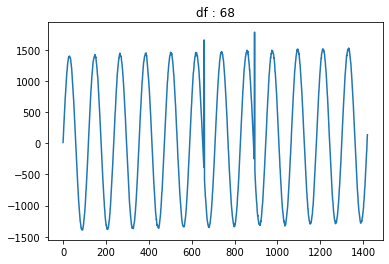

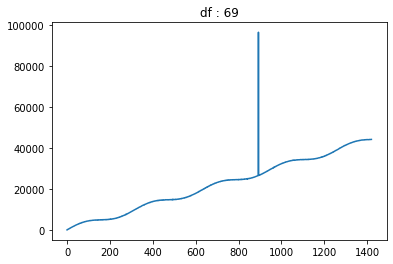

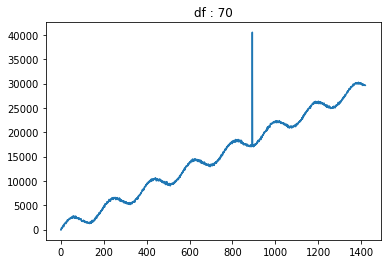

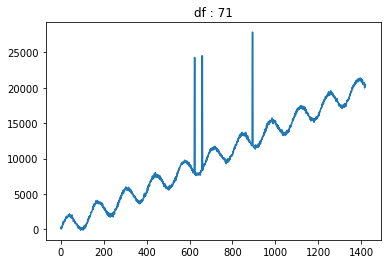

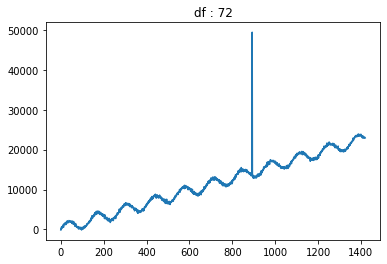

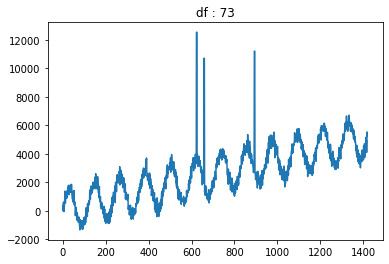

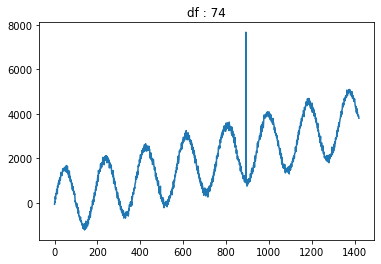

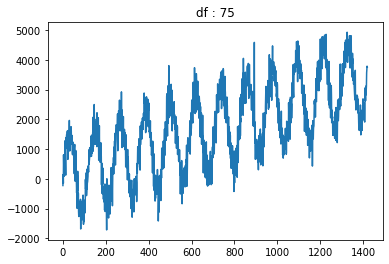

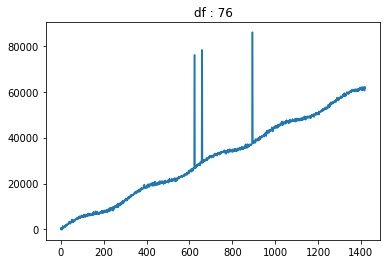

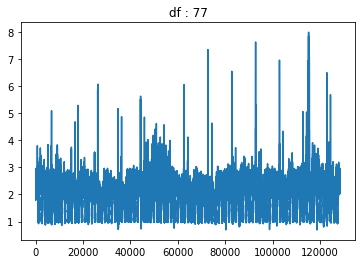

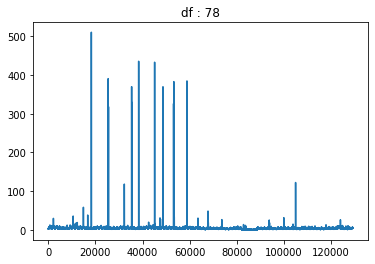

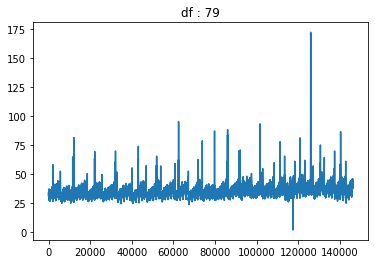

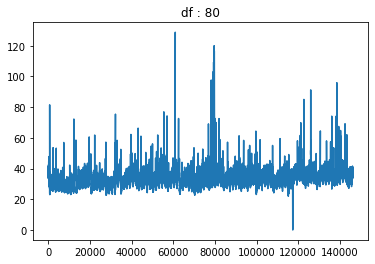

In [243]:
for i in range(len(df_list)):
    df_list[i]['value'].plot()
    plt.title('df : {}'.format(i))
    plt.show()

In [262]:
fft(df_list[59].value)


array([157288.19987914    +0.j        ,   3084.14904383+51421.9680056j ,
        -1004.59884077+19922.73087976j, ...,
         2384.62487534-22132.54757577j,  -1004.59884077-19922.73087976j,
         3084.14904383-51421.9680056j ])

<AxesSubplot:>

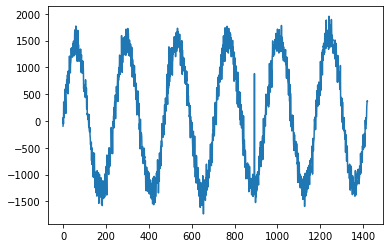

In [245]:
df=pd.read_csv('63.csv')
df.value.plot()

In [246]:
value_list=[]
i=0
for x in df_list:
    X=fft(df_list[i]['value'])
    value_list.append(X)
    i+=1
print(value_list)    
    
    
    

[array([ 2.24369123e+08       +0.j        ,
       -6.31461453e+06-18155637.87055095j,
        3.87894922e+06 +2552247.28886723j, ...,
       -3.21977113e+06 +9613172.58134976j,
        3.87894922e+06 -2552247.28886723j,
       -6.31461453e+06+18155637.87055095j]), array([5367146.23           +0.j        ,
         71807.09421491+170500.12093044j,
         -8096.77437351 +85711.28555465j, ...,
         13654.56696082 -83771.35932476j,
         -8096.77437351 -85711.28555465j,
         71807.09421491-170500.12093044j]), array([ 2.19726442e+08+1.14596332e-10j,  8.97094627e+06+1.18784847e+07j,
        3.25666250e+06+7.77437214e+06j, ...,
       -1.69065203e+06+2.96082922e+06j,  3.25666250e+06-7.77437214e+06j,
        8.97094627e+06-1.18784847e+07j]), array([  707.53245138   +0.j        , -1030.17637663+4542.15653539j,
       -1105.18542447 -176.16111129j, ..., -3277.53799754+2181.17317209j,
       -1105.18542447 +176.16111129j, -1030.17637663-4542.15653539j]), array([-4.24313446e+06      

In [ ]:
df_list[59].value.plot()

In [297]:
data_list = []
for i in range (len(df_list)):
    X=fft(df_list[i].value)
    

    img_list=[]
    y=0
    for x in X:
        imag_part = X.imag[y]
        img_list.append(imag_part)
        y+=1
    #print (img_list)    


    real_list=[]
    y=0
    for x in X:
        real_part = X.real[y]
        real_list.append(real_part)
        y+=1
    #print (real_list)  


    phase=pd.Series(img_list)
    data1=pd.DataFrame(phase  ,   columns=['imag'])
    data1['real']=real_list

    data1['phase'] = np.arctan (data1['imag'] / data1['real'])
    data1['Amp'] = np.sqrt((data1['real']**2) + (data1['imag']**2))

    data_list.append(data1)

In [301]:
data_list[0]

imag          real     phase           Amp
0       0.000000e+00  2.243691e+08  0.000000  2.243691e+08
1      -1.815564e+07 -6.314615e+06  1.236079  1.922242e+07
2       2.552247e+06  3.878949e+06  0.581960  4.643298e+06
3      -9.613173e+06 -3.219771e+06  1.247607  1.013805e+07
4      -1.110973e+06 -4.569055e+05  1.180616  1.201259e+06
...              ...           ...       ...           ...
147663  2.403555e+06 -2.222454e+06 -0.824527  3.273588e+06
147664  1.110973e+06 -4.569055e+05 -1.180616  1.201259e+06
147665  9.613173e+06 -3.219771e+06 -1.247607  1.013805e+07
147666 -2.552247e+06  3.878949e+06 -0.581960  4.643298e+06
147667  1.815564e+07 -6.314615e+06 -1.236079  1.922242e+07

[147668 rows x 4 columns]

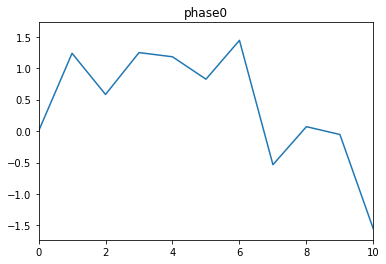

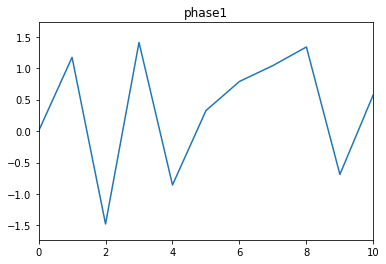

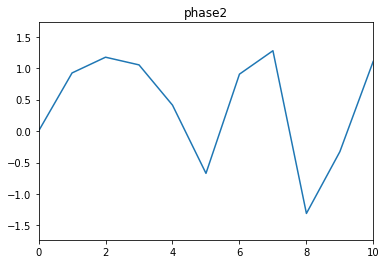

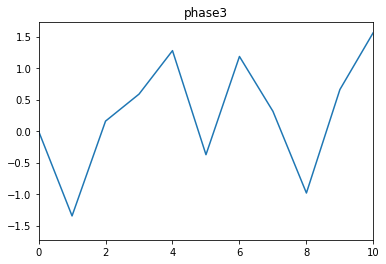

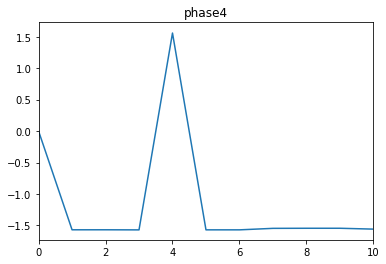

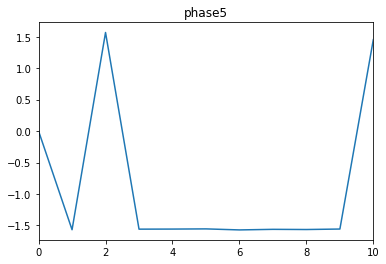

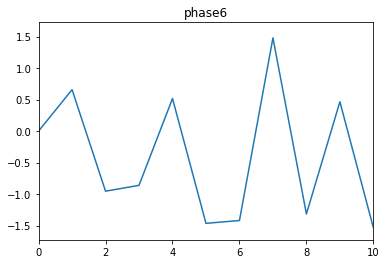

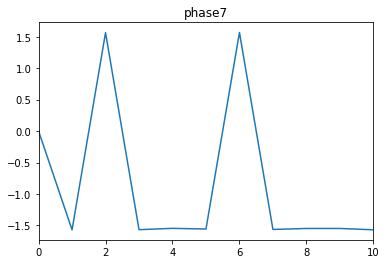

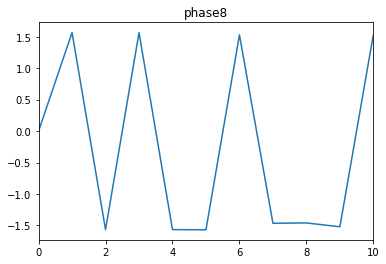

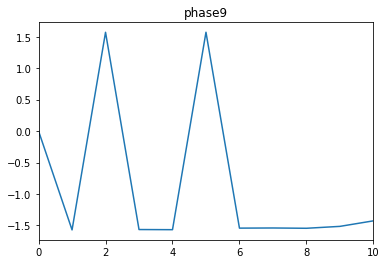

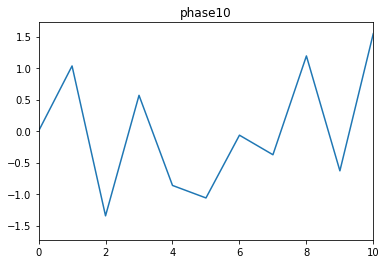

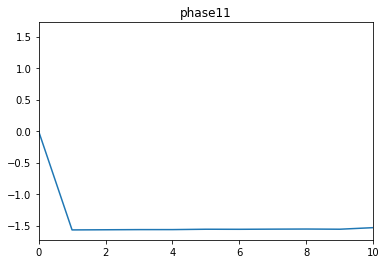

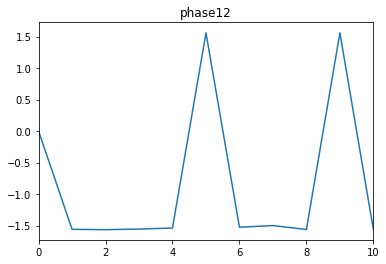

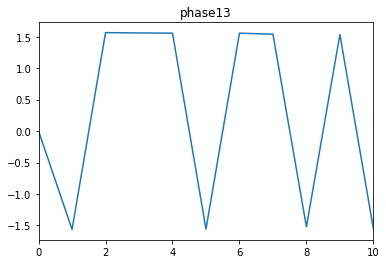

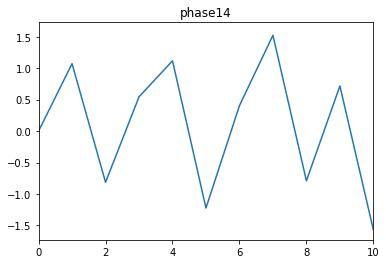

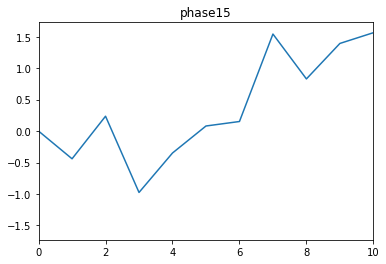

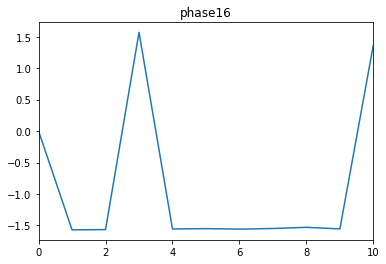

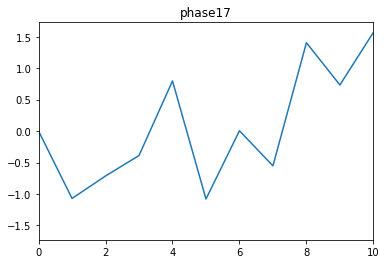

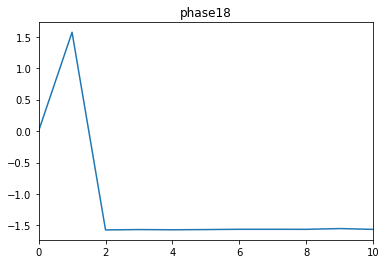

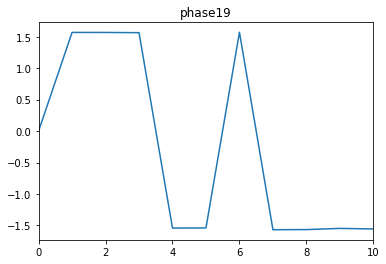

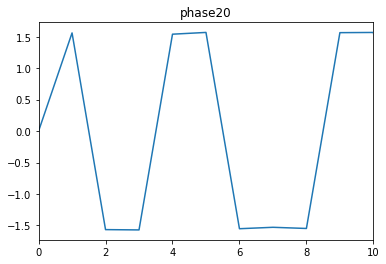

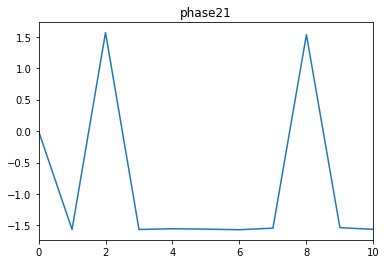

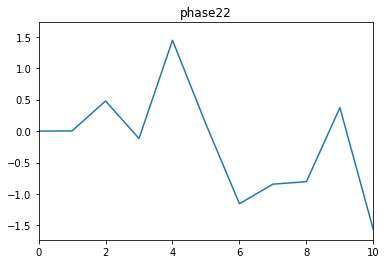

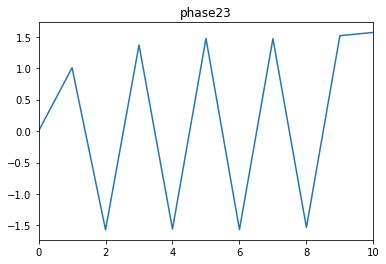

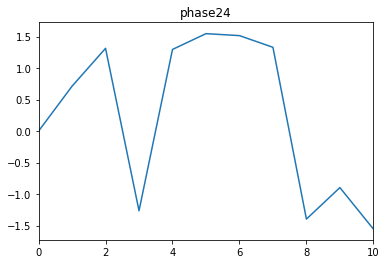

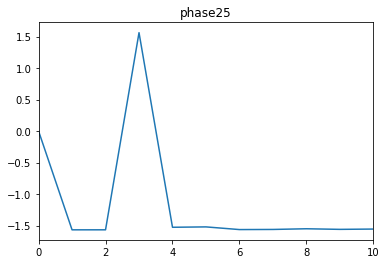

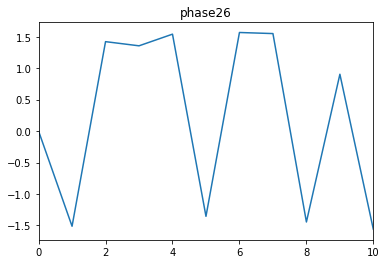

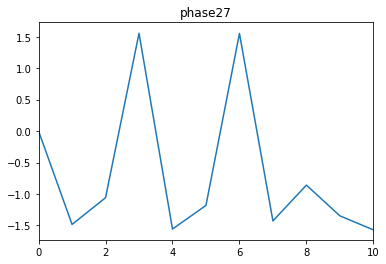

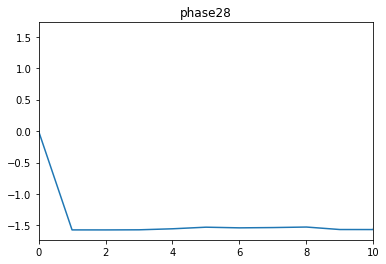

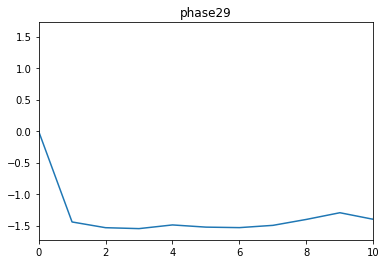

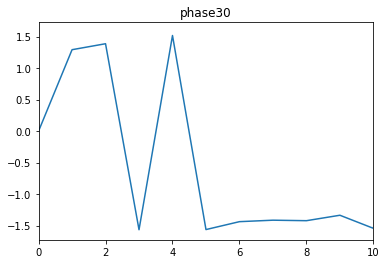

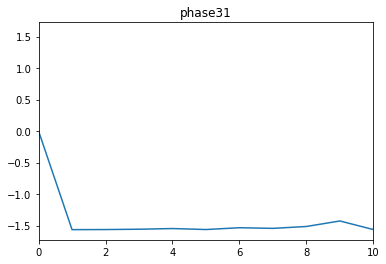

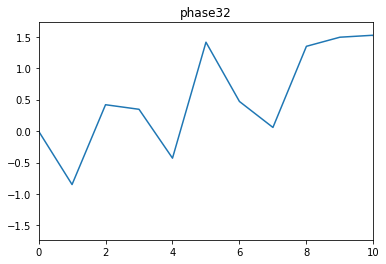

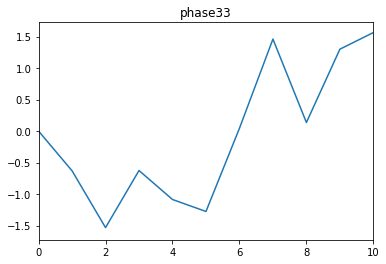

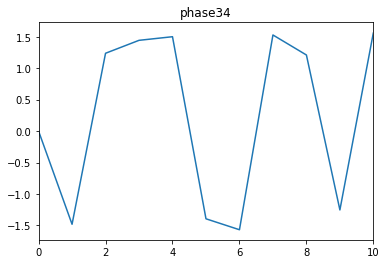

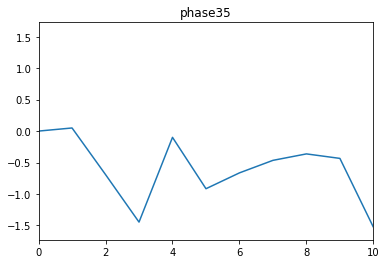

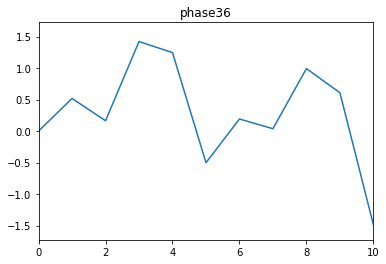

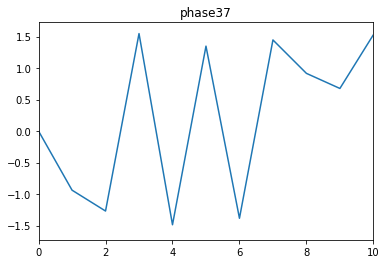

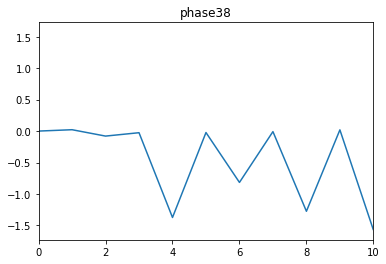

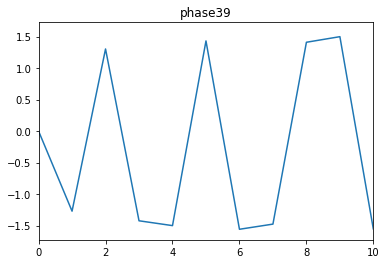

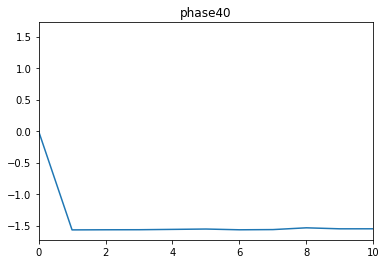

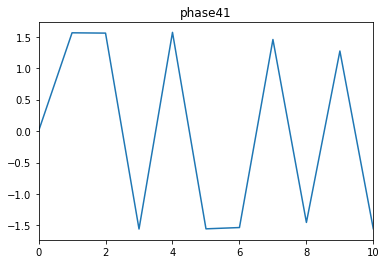

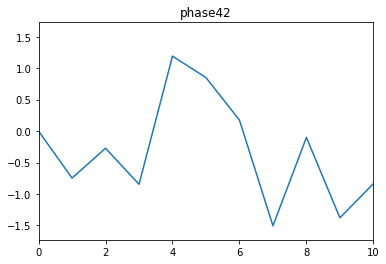

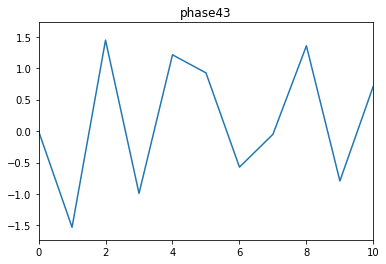

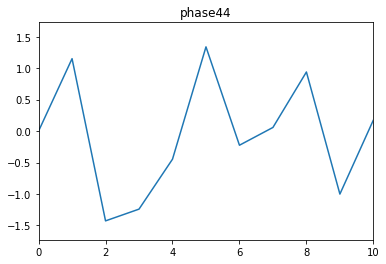

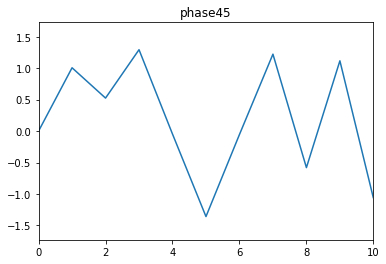

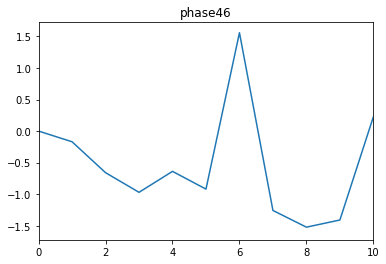

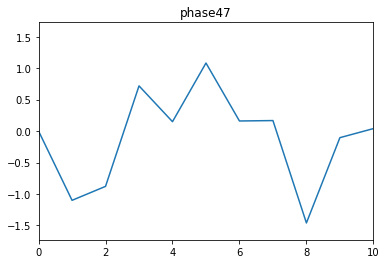

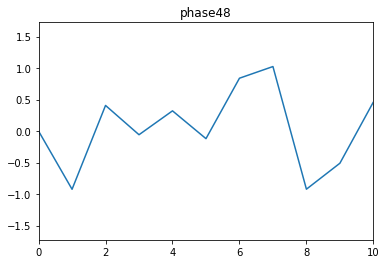

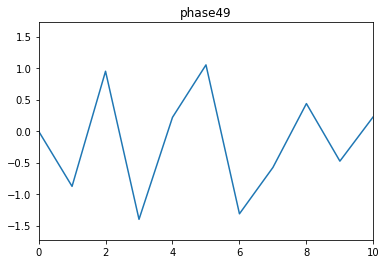

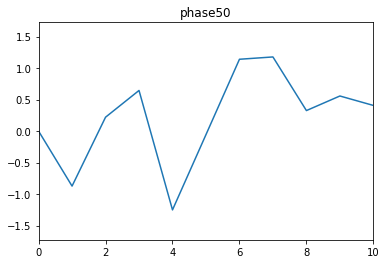

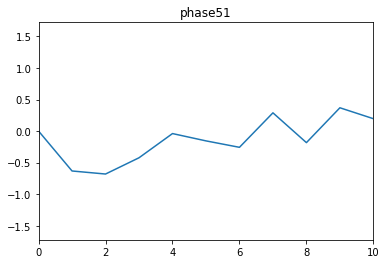

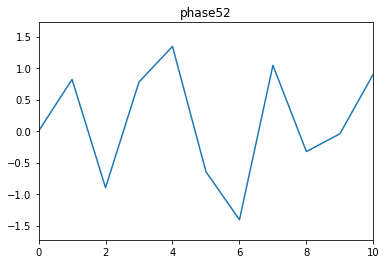

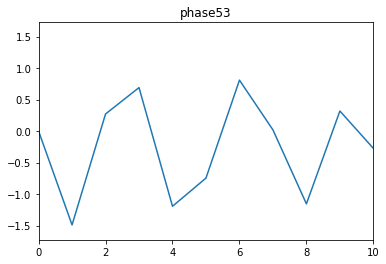

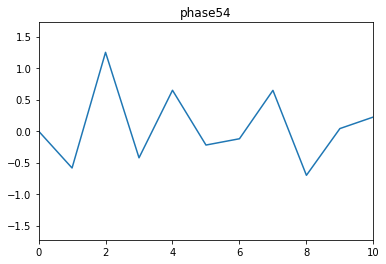

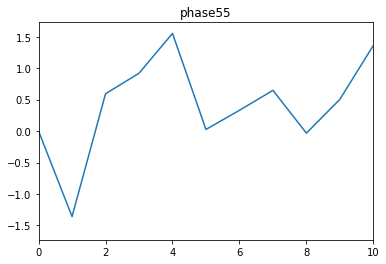

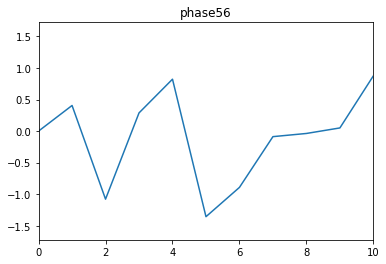

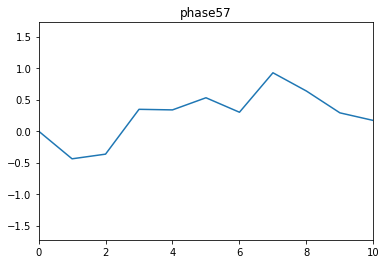

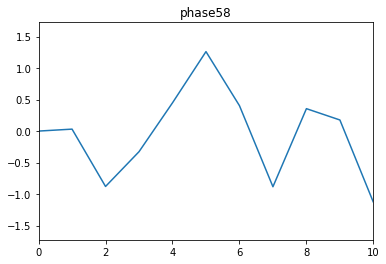

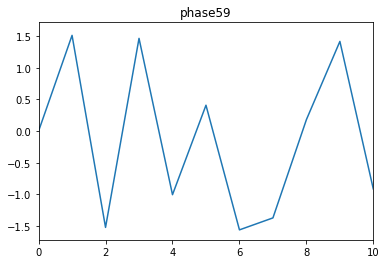

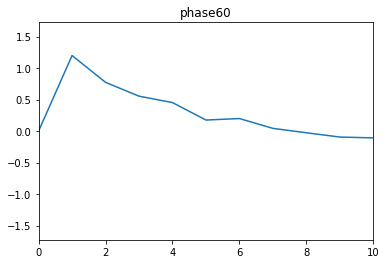

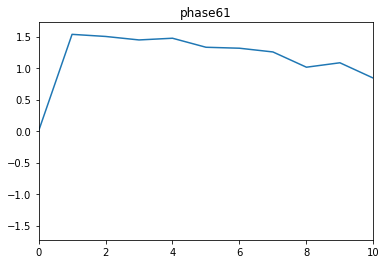

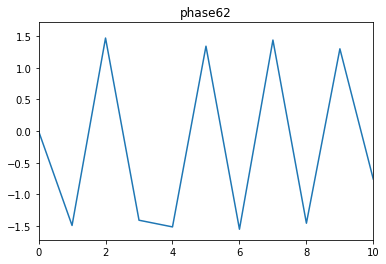

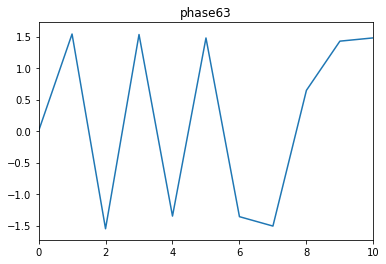

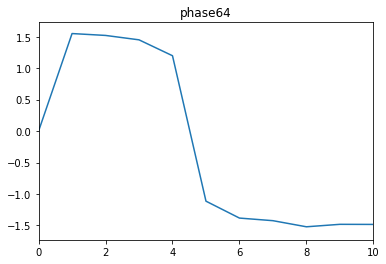

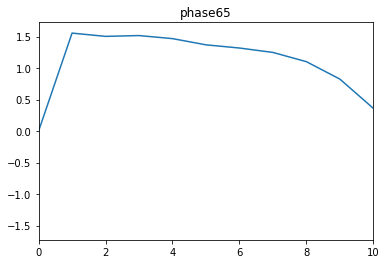

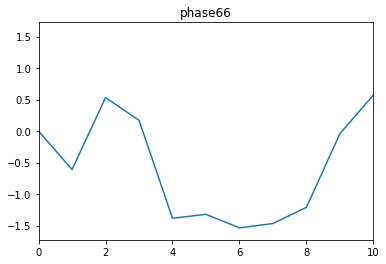

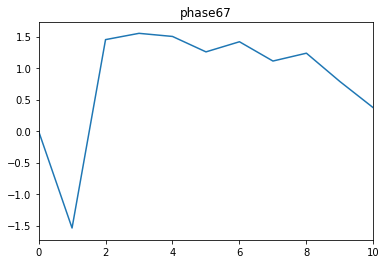

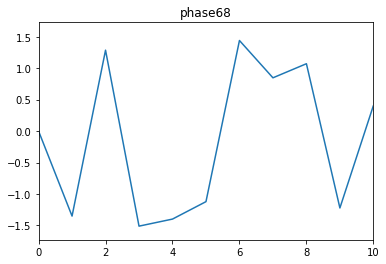

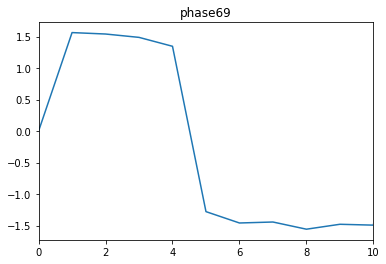

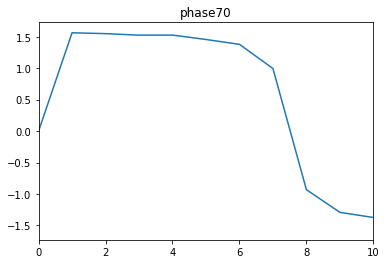

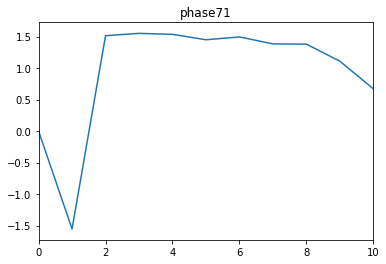

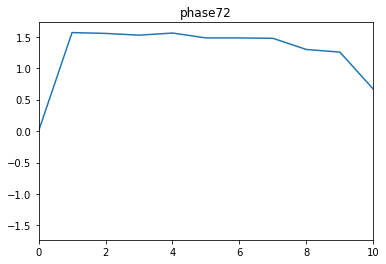

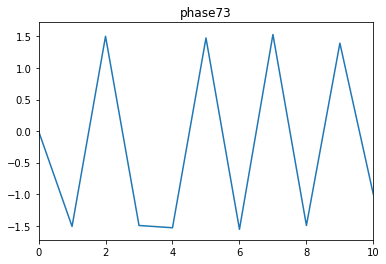

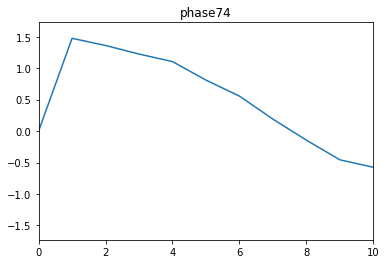

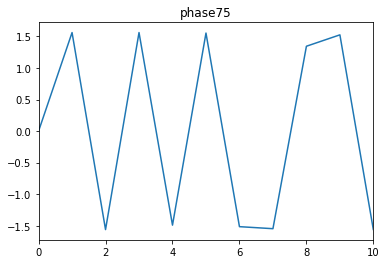

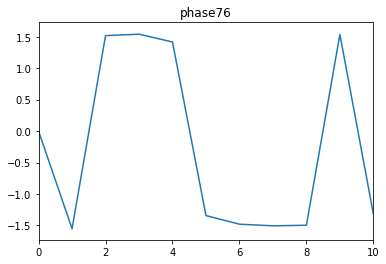

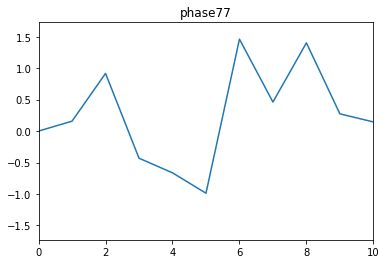

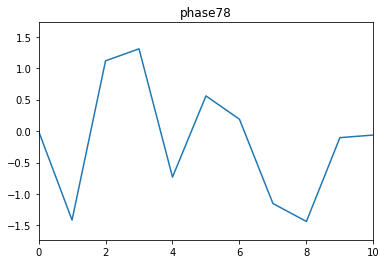

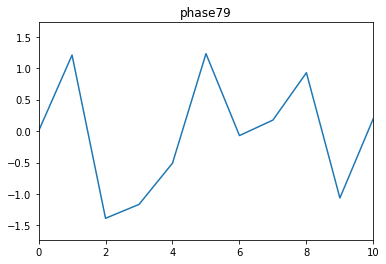

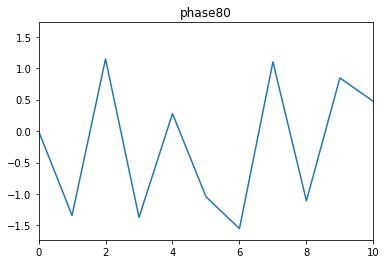

In [310]:
for i in range (len(data_list)):
    plt.xlim((0,10))
    data_list[i].phase.plot()
    plt.title('phase' + str(i))
    plt.show()

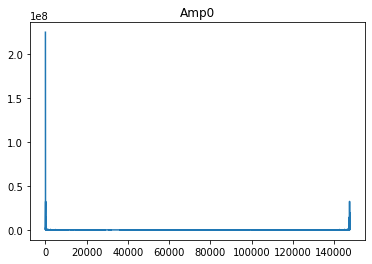

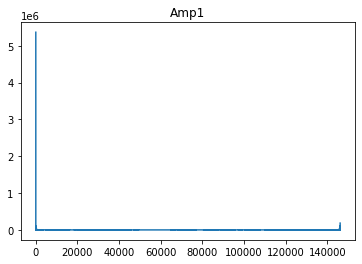

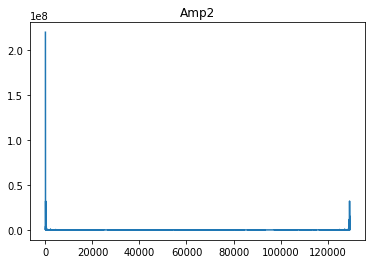

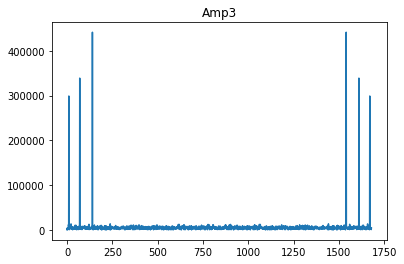

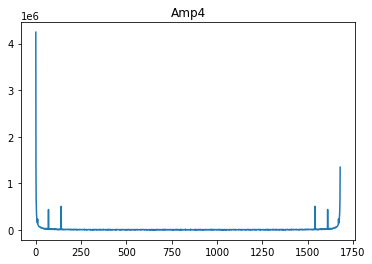

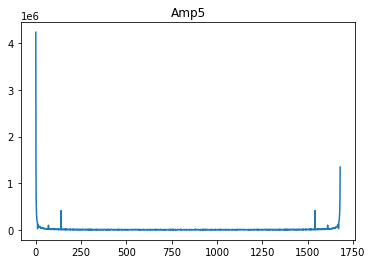

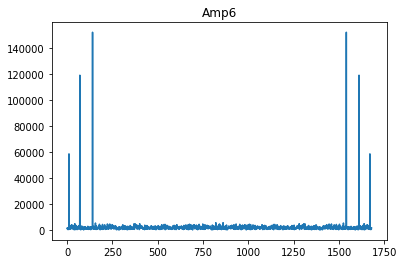

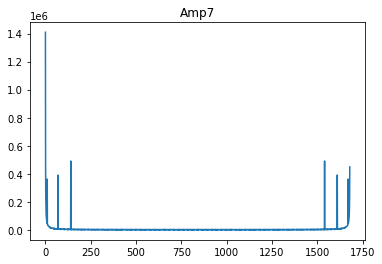

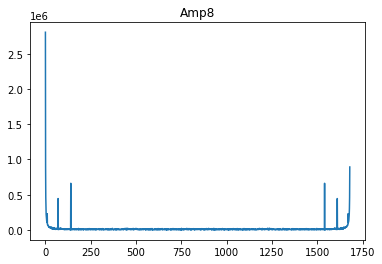

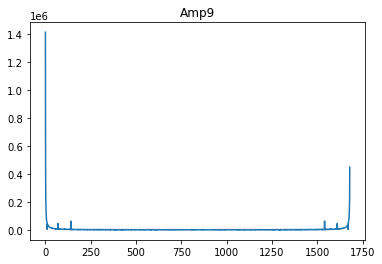

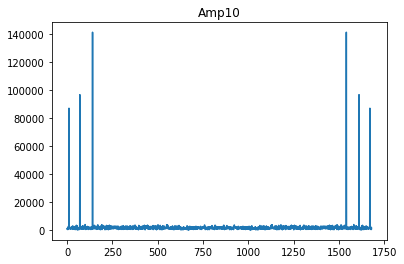

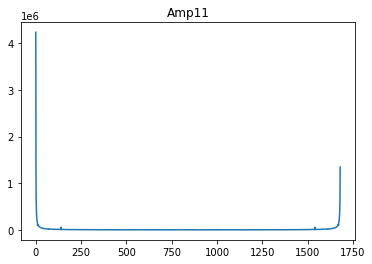

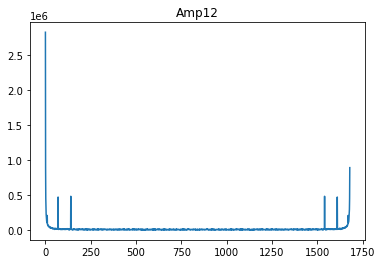

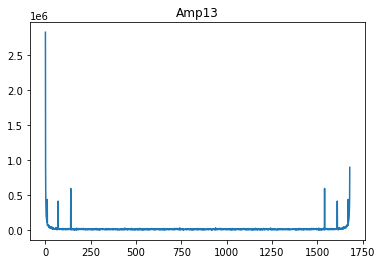

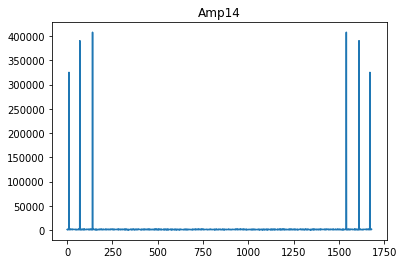

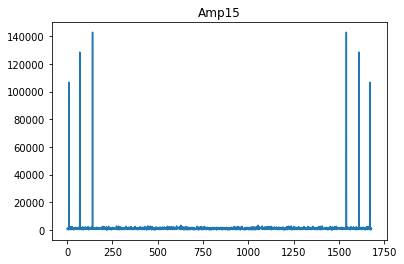

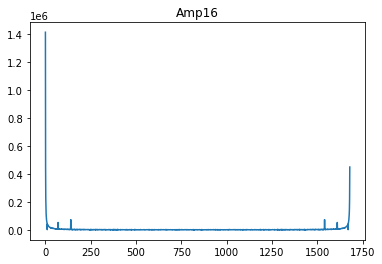

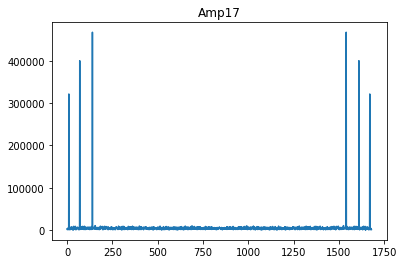

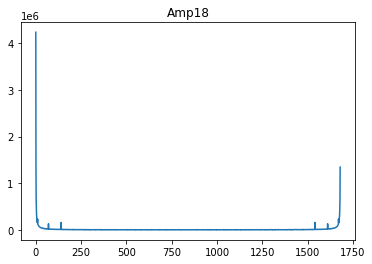

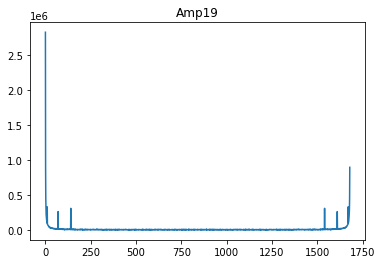

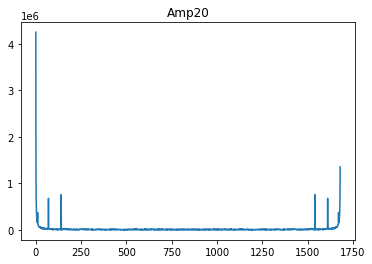

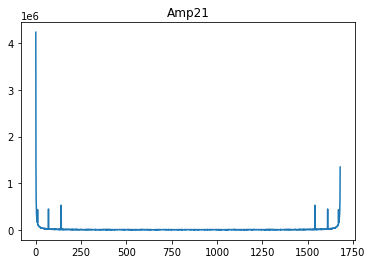

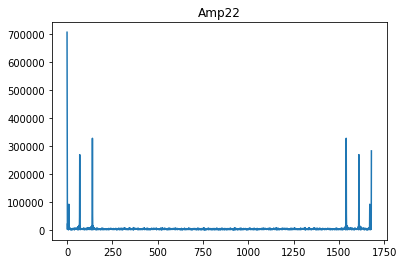

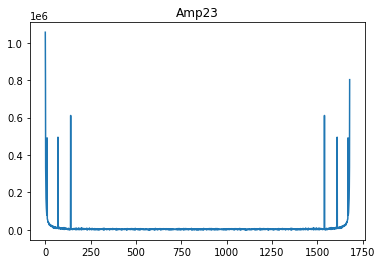

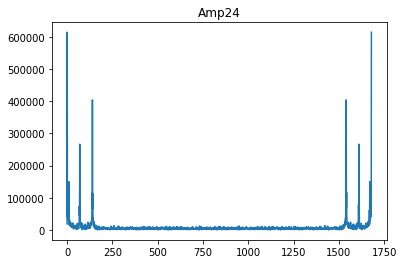

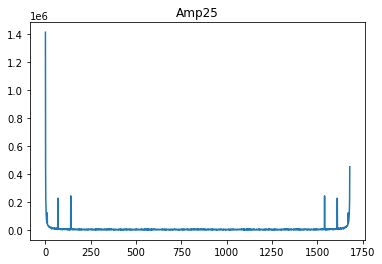

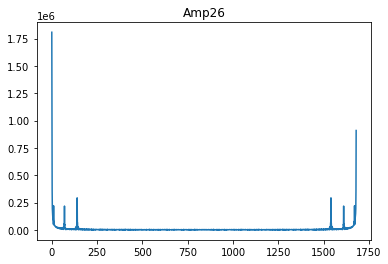

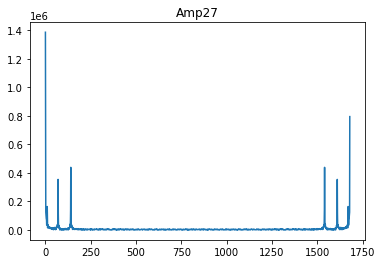

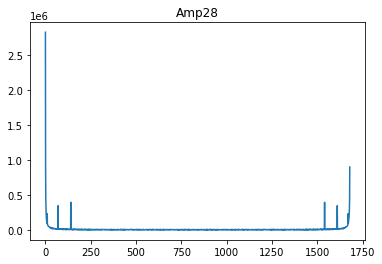

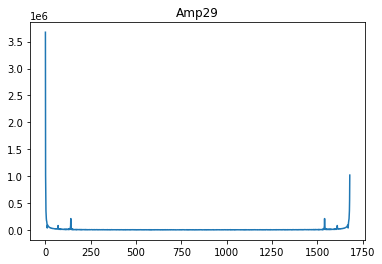

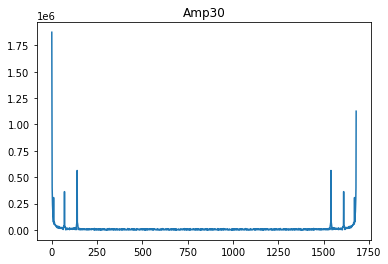

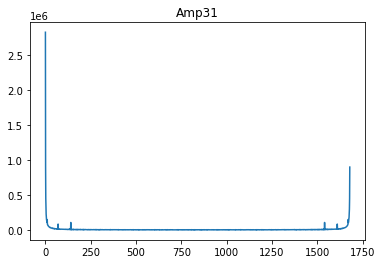

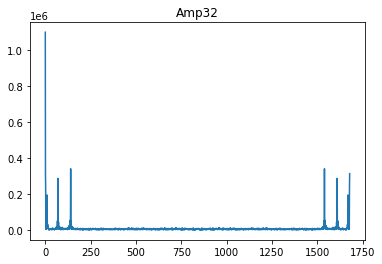

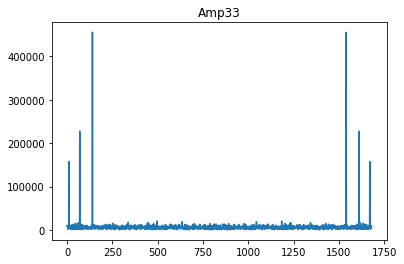

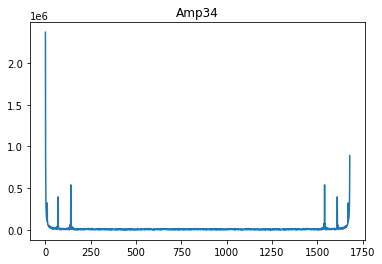

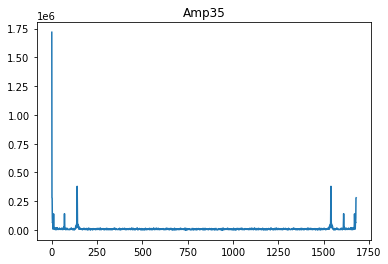

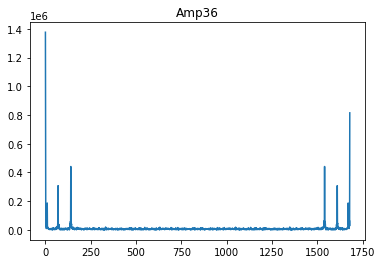

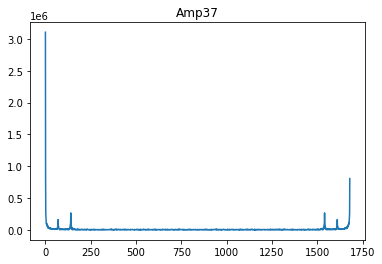

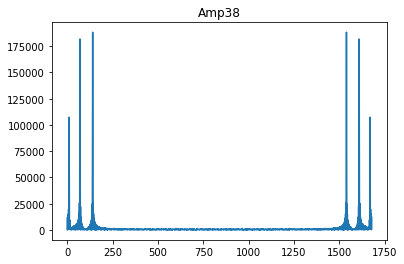

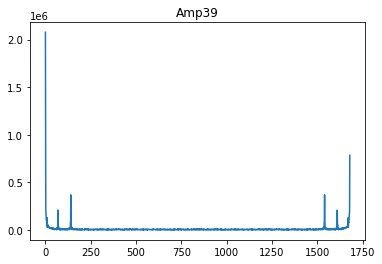

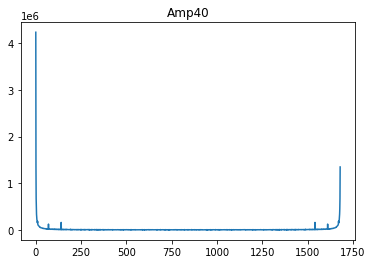

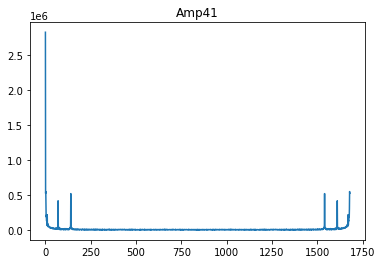

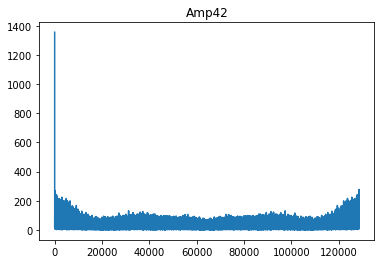

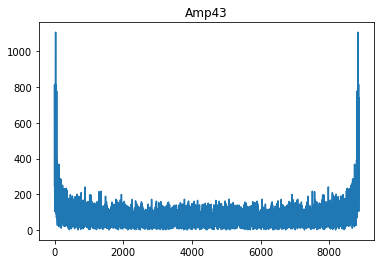

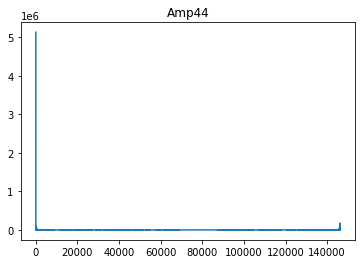

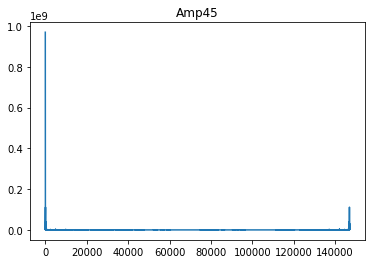

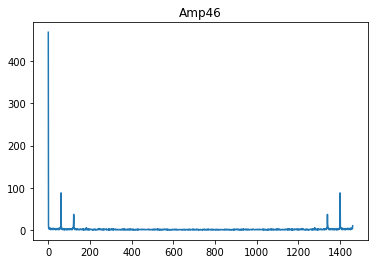

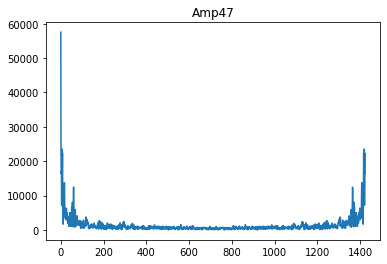

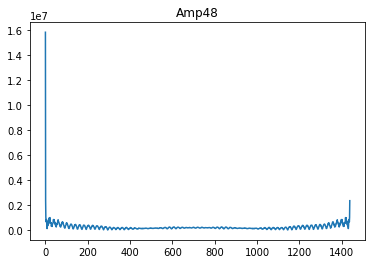

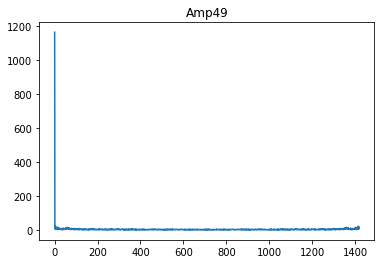

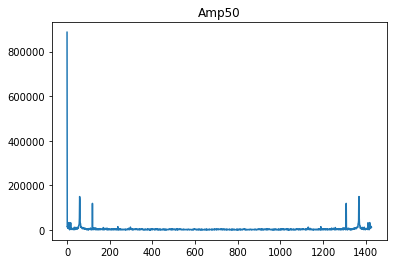

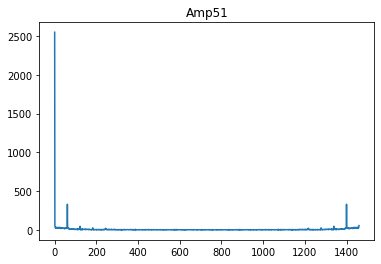

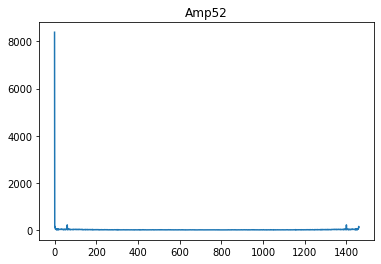

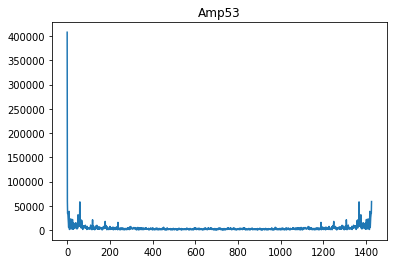

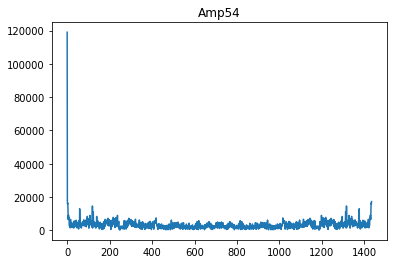

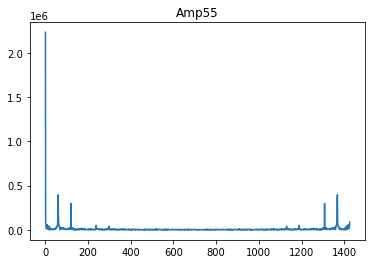

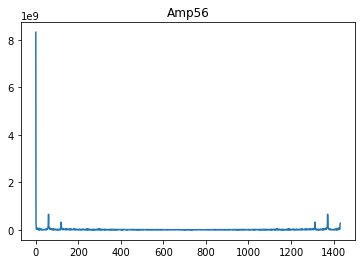

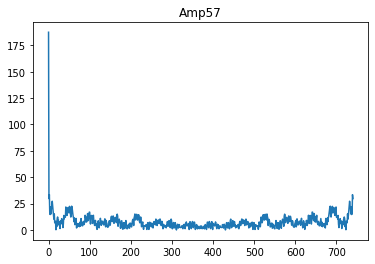

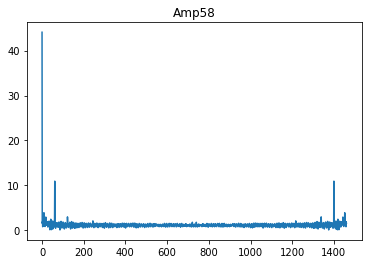

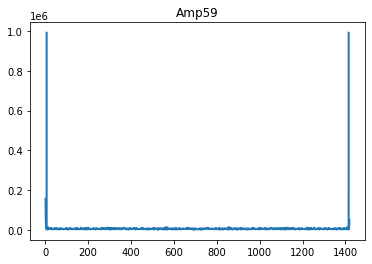

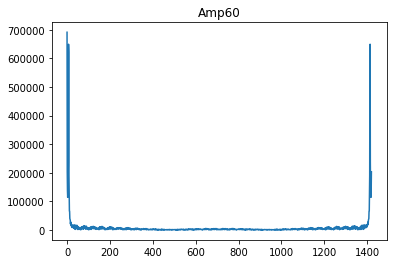

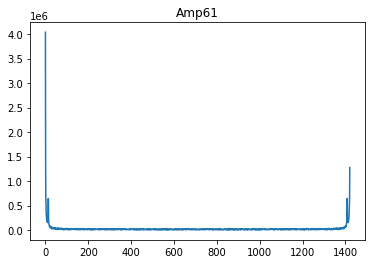

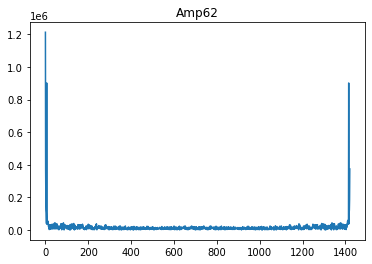

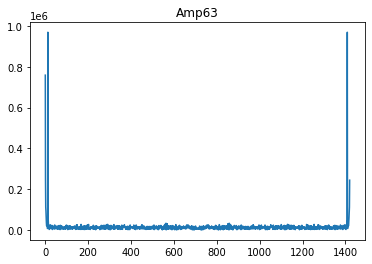

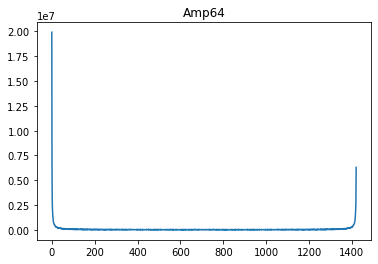

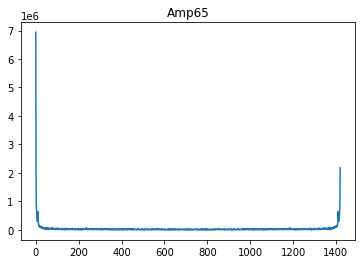

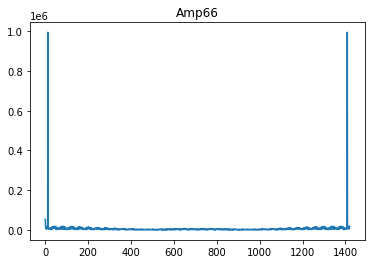

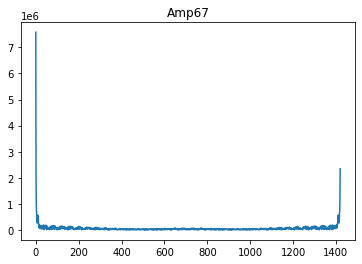

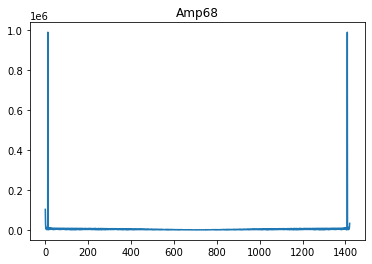

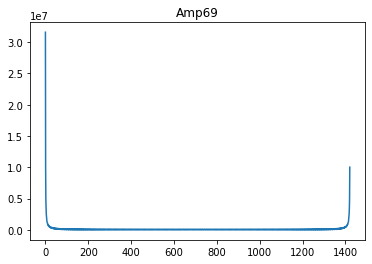

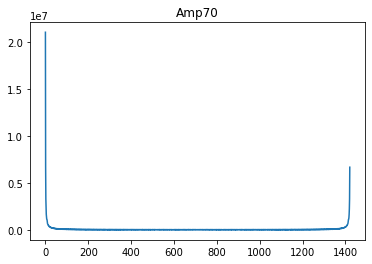

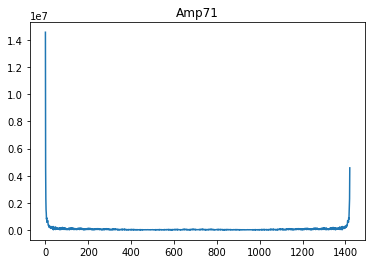

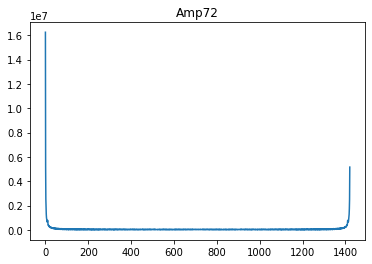

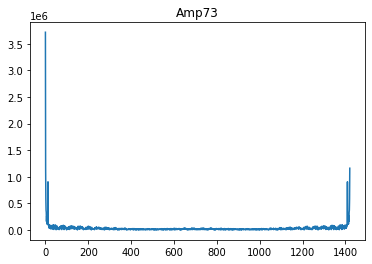

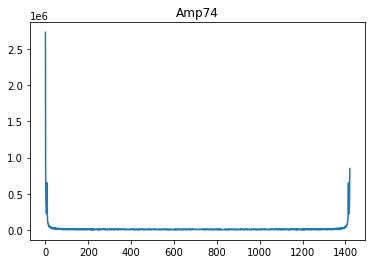

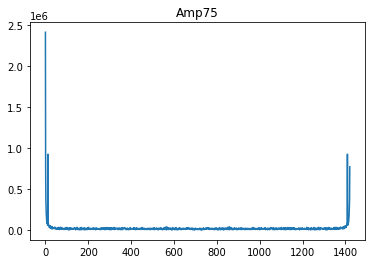

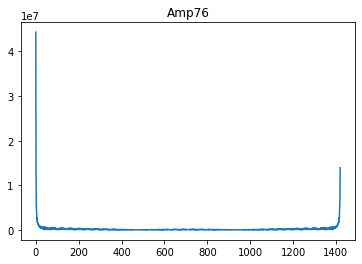

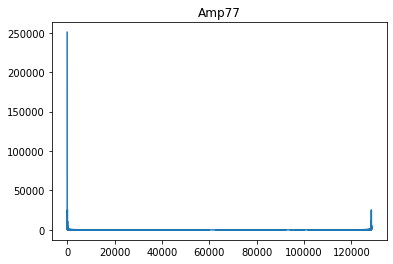

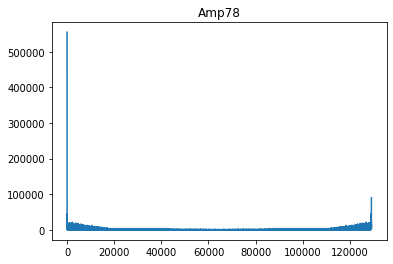

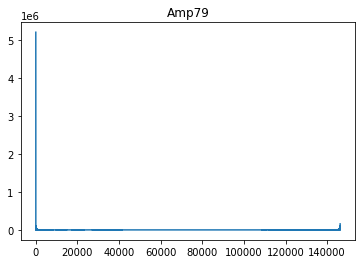

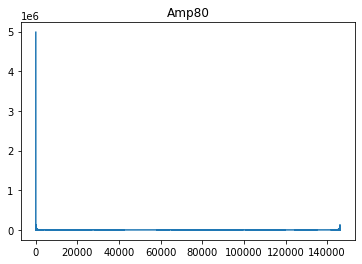

In [312]:
for i in range (len(data_list)):
    #plt.xlim((0,10))
    data_list[i].Amp.plot()
    plt.title('Amp' + str(i))
    plt.show()